# Lasso Regression

In [0]:
# Import Libraries
#
import pandas as pd
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
Features = np.array(pd.read_csv('Auto_Data_Features.csv'))
Labels = np.array(pd.read_csv('Auto_Data_Labels.csv'))
print(Features.shape)
print(Labels.shape)

(195, 45)
(195, 1)


In [0]:

## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)

x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

Mean Square Error      = 0.02103483180293406
Root Mean Square Error = 0.14503389880622414
Mean Absolute Error    = 0.11896679673181176
Median Absolute Error  = 0.09769580826160063
R^2                    = 0.927117834599049


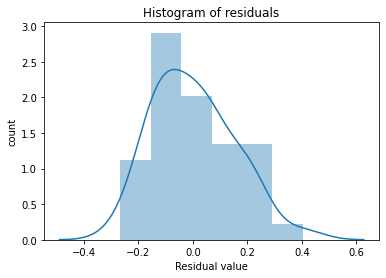

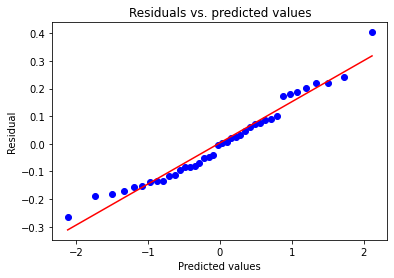

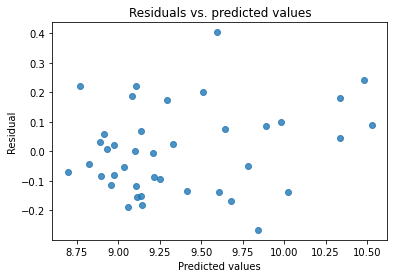

In [0]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(x_train, y_train)

def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
  

y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score) 
hist_resids(y_test, y_score)  
resid_qq(y_test, y_score) 
resid_plot(y_test, y_score)

****Overall these results are reasonably good. The error metrics are relatively small. Further, the distribution of the residuals is a bit skewed, but otherwise well behaved.****

## l2 regularization

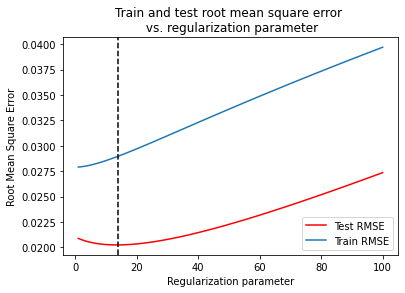

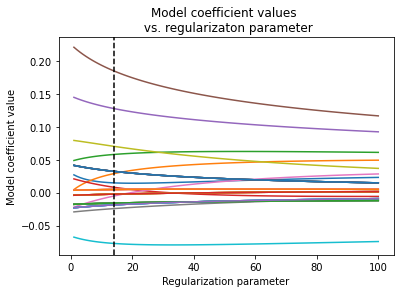

(14, 0.020249281682184834)


In [0]:

def plot_regularization(l, train_RMSE, test_RMSE, coefs, min_idx,title):   
    plt.plot(l, test_RMSE, color = 'red', label = 'Test RMSE')
    plt.plot(l, train_RMSE, label = 'Train RMSE')    
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.legend()
    plt.xlabel('Regularization parameter')
    plt.ylabel('Root Mean Square Error')
    plt.title(title)
    plt.show()
    
    plt.plot(l, coefs)
    plt.axvline(min_idx, color = 'black', linestyle = '--')
    plt.title('Model coefficient values \n vs. regularizaton parameter')
    plt.xlabel('Regularization parameter')
    plt.ylabel('Model coefficient value')
    plt.show()

def test_regularization_l2(x_train, y_train, x_test, y_test, l2):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l2:
        lin_mod = linear_model.Ridge(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RMSE = test_RMSE[min_idx]
        
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l2, train_RMSE, test_RMSE, coefs, min_l2, title)
    return min_l2, min_RMSE
        
l2 = [x for x in range(1,101)]
out_l2 = test_regularization_l2(x_train, y_train, x_test, y_test, l2)
print(out_l2)

The top plot shows the training and test RMSE vs the regularization parameter. The point with the minimum RMSE is shown with a dotted line. Notice that there is a minimum where the l2 parameter has a value of 14.0. To the left of the minimum variance dominates bias. To the right of the minimum bias dominates variance. In this case, the changes in RMSE are not dramatic until the bias grows significantly.


The bottom plot shows the value of the 45 model coefficients vs. the regularization parameter. At the left the regularization penalty is small and the coefficient values show a wide range of values, giving a high variance model. To the right the coefficient values become more tightly clustered, giving a more constrained and higher bias model.

***Next, you will evaluate the model using the best l2 regularization parameter discovered above. The code in the cell below computes the regression model with the training data and computes and displays the results using the test data***

Mean Square Error      = 0.020249281682184834
Root Mean Square Error = 0.14229997077366122
Mean Absolute Error    = 0.11685808644799409
Median Absolute Error  = 0.11642918023953719
R^2                    = 0.9298396340585149


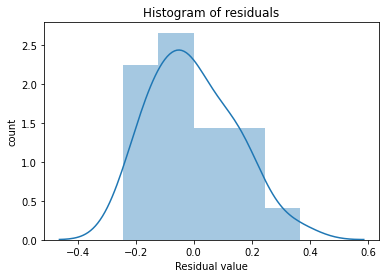

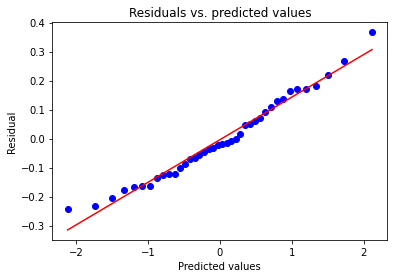

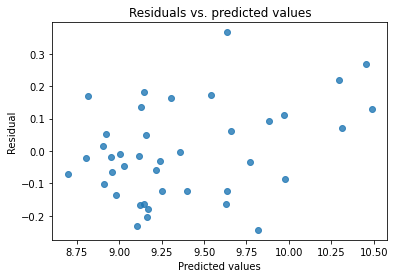

In [0]:
lin_mod_l2 = linear_model.Ridge(alpha = out_l2[0])
lin_mod_l2.fit(x_train, y_train)
y_score_l2 = lin_mod_l2.predict(x_test)

print_metrics(y_test, y_score_l2)
hist_resids(y_test, y_score_l2)  
resid_qq(y_test, y_score_l2) 
resid_plot(y_test, y_score_l2)

Regularization can be performed using norms other than l2. The l1 regularizaton or Lasso method limits the sum of the absolute values of the model coefficients. The l1 norm is sometime know as the Manhattan norm, since distance are measured as if you were traveling on a rectangular grid of streets.

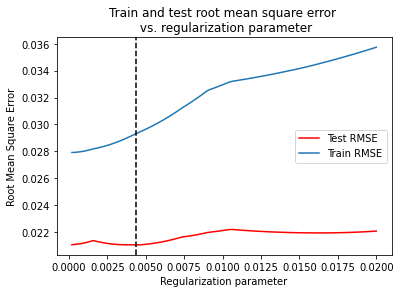

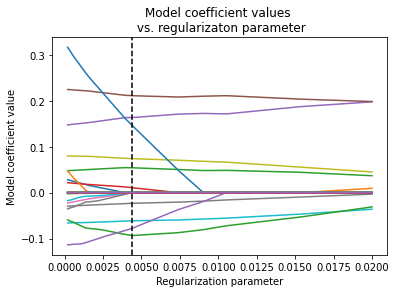

(0.0044, 0.02101807877979179)


In [0]:

def test_regularization_l1(x_train, y_train, x_test, y_test, l1):
    train_RMSE = []
    test_RMSE = []
    coefs = []
    for reg in l1:
        lin_mod = linear_model.Lasso(alpha = reg)
        lin_mod.fit(x_train, y_train)
        coefs.append(lin_mod.coef_)
        y_score_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_score_train))
        y_score = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test, y_score))
    min_idx = np.argmin(test_RMSE)
    min_l1 = l1[min_idx]
    min_RMSE = test_RMSE[min_idx]
    
    title = 'Train and test root mean square error \n vs. regularization parameter'
    plot_regularization(l1, train_RMSE, test_RMSE, coefs, min_l1, title)
    return min_l1, min_RMSE
    
l1 = [x/5000 for x in range(1,101)]
out_l1 = test_regularization_l1(x_train, y_train, x_test, y_test, l1)
print(out_l1)

As before, the top plot shows the training and test RMSE vs the regularization parameter. The point with the minimum RMSE is shown with a dotted line. Notice that there is a minimum where the l1 parameter has a value of 0.0044. To the left of the minimum variance dominates bias. To the right of the minimum bias dominates variance. Notice that the curve of RMSE has some kinks or sharp bends. This is in contrast to the smooth curve produced by l2 regularization.

The bottom plot shows the value of the 45 model coefficients vs. the regularization parameter. At the left the regularization penalty is small and the coefficient values show a wide range of values, giving a high variance model. To the right the coefficient values become more tightly clustered, giving a more constrained and higher bias model. In addition, many of the parameters are being driven to zero as the regularization parameter increases. The parameters being driven to zero account for the kinks in the RMSE curve.

***The code in the cell below computes the l1 regularized regression model with the training data and computes and displays the results using the test data.***

In [0]:
lin_mod_l1 = linear_model.Lasso(alpha = out_l1[0])
lin_mod_l1.fit(x_train, y_train)
y_score_l1 = lin_mod_l1.predict(x_test)

print_metrics(y_test, y_score_l1) 
hist_resids(y_test, y_score_l1)  
resid_qq(y_test, y_score_l1) 
resid_plot(y_test, y_score_l1)

## *Summary*

In this lab you have explored the basics of regularization. Regularization can prevent machine learning models from being overfit. Regularization is required to help machine learning models generalize when placed in production. Selection of regularization strength involves consideration of the bias-variance trade-off.

L2 and l1 regularization constrain model coefficients to prevent overfitting. L2 regularization constrains model coefficients using a Euclidian norm. L2 regularization can drive some coefficients toward zero, usually not to zero. On the other hand, l1 regularization can drive model coefficients to zero.